In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
plot_step = 0.02
pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]

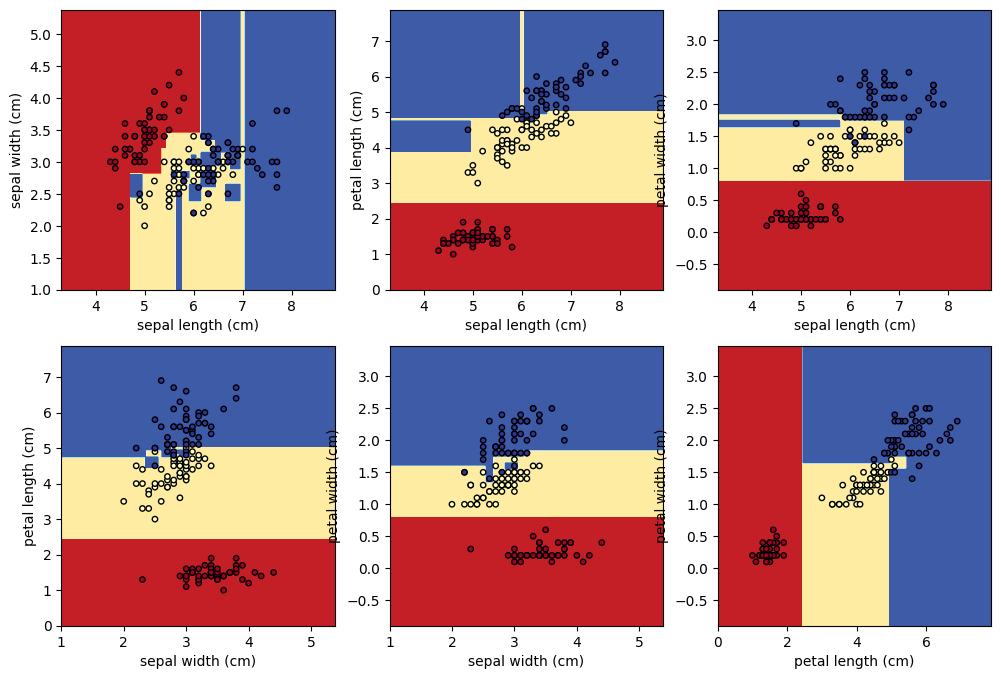

In [4]:
plt.figure(figsize=(12, 8))
for i, (f1, f2) in enumerate(pairs):
    X_pair = X[:, [f1, f2]]
    clf = DecisionTreeClassifier().fit(X_pair, y)

    # Meshgrid
    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    # Predict & reshape
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot
    plt.subplot(2, 3, i + 1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plt.scatter(X_pair[:, 0], X_pair[:, 1], c=y, edgecolor="k", cmap=plt.cm.RdYlBu, s=15)
    plt.xlabel(iris.feature_names[f1])
    plt.ylabel(iris.feature_names[f2])

In [5]:
plt.suptitle("Decision Surface of Decision Trees on Feature Pairs")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

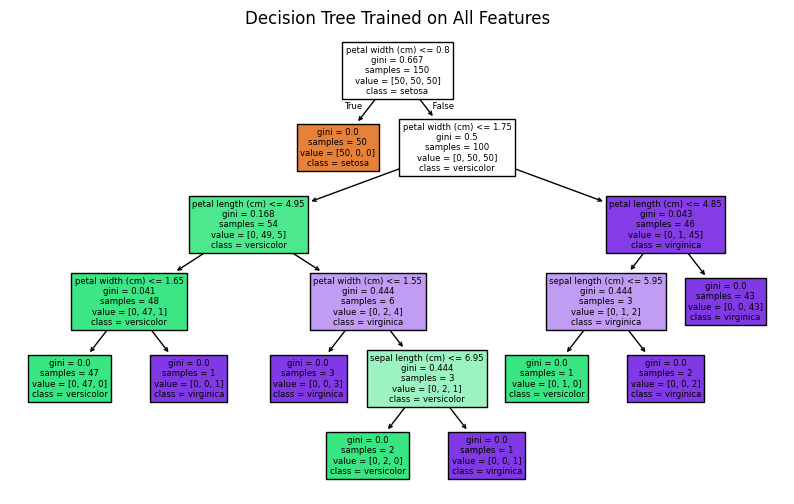

In [6]:
clf_full = DecisionTreeClassifier().fit(X, y)
plt.figure(figsize=(10, 6))
plot_tree(clf_full, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree Trained on All Features")
plt.show()